In [1]:
import upath
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [75]:
sel_area='MOs'
folder_name='no_pr_criteria_'+sel_area+'_2025-03-21'

paths={}
paths['no_drift']=upath.UPath('s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/no_drift_'+folder_name)
paths['loose_drift']=upath.UPath('s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/loose_drift_'+folder_name)
paths['medium_drift']=upath.UPath('s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/medium_drift_'+folder_name)
paths['strict_drift']=upath.UPath('s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/strict_drift_'+folder_name)


fig_folder=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2025-03-25-drift_criteria_decoding_summary"
#concat within each folder, then compare across different drift criteria

In [76]:
path_key='strict_drift'

results_csvs = []

for file in paths[path_key].glob('*'):
    if 'results.csv' in str(file):
        results_csvs.append(file)

results_csvs

[S3Path('s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/strict_drift_no_pr_criteria_MOs_2025-03-21/620264_2022-08-02_linear_shift_decoding_results.csv'),
 S3Path('s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/strict_drift_no_pr_criteria_MOs_2025-03-21/628801_2022-09-19_linear_shift_decoding_results.csv'),
 S3Path('s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/strict_drift_no_pr_criteria_MOs_2025-03-21/649944_2023-02-28_linear_shift_decoding_results.csv'),
 S3Path('s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/strict_drift_no_pr_criteria_MOs_2025-03-21/664851_2023-11-15_linear_shift_decoding_results.csv'),
 S3Path('s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/strict_drift_no_pr_criteria_MOs_2025-03-21/668759_2023-07-12_linear_shift_decoding_results.csv'),
 S3Path('s3://aind-scratch-data/dynamic-routing/ethan/decoding-results/strict_drift_no_pr_criteria_MOs_2025-03-21/686176_2023-12-07_linear_shift_decoding_r

In [77]:
first_path=True
results_path_list=[]
for key in paths.keys():
    path=paths[key]
    for file in path.glob('*'):
        if 'results.csv' in str(file):
            # results_path_list.append(file)
            temp_results=pd.read_csv(file)
            temp_results['drift_criteria']=key
            if first_path:
                results=temp_results
                first_path=False
            else:
                results=pd.concat([results,temp_results],axis=0)

In [78]:
results

,Unnamed: 0,session_id,project,area,ccf_ap_mean,ccf_dv_mean,ccf_ml_mean,n_units,probe,cross_modal_dprime,...,null_accuracy_std_30,p_value_30,true_accuracy_all_trials_no_shift_30,true_accuracy_all,null_accuracy_mean_all,null_accuracy_median_all,null_accuracy_std_all,p_value_all,true_accuracy_all_trials_no_shift_all,drift_criteria
0,0,620264_2022-08-02,TempletonPilotSession,MOs,2611.296296,2489.629630,4080.000000,135,NaN,NaN,...,0.012143,0.495726,0.621586,0.728170,0.687036,0.687282,0.026156,0.042735,0.742101,no_drift
0,0,628801_2022-09-19,TempletonPilotSession,MOs,3584.952978,2154.780564,4352.115987,319,NaN,NaN,...,0.009660,0.500000,0.581910,0.610526,0.630370,0.628947,0.025026,0.824324,0.625253,no_drift
0,0,649944_2023-02-28,TempletonPilotSession,MOs,3797.532895,1857.483553,4714.062500,304,NaN,NaN,...,0.015499,0.981481,0.618344,0.692710,0.697184,0.699075,0.029830,0.564815,0.723342,no_drift
0,0,664851_2023-11-15,DynamicRouting,MOs,3897.593897,1796.889671,4795.011737,426,NaN,2.882118,...,0.048415,0.000000,0.721500,0.899284,0.762340,0.765653,0.071943,0.011364,0.900699,no_drift
0,0,668759_2023-07-12,TempletonPilotSession,MOs,3391.885626,2315.262751,4307.032457,647,NaN,NaN,...,0.011489,0.504505,0.588295,0.714816,0.703113,0.701140,0.021281,0.279279,0.744576,no_drift
0,0,686176_2023-12-07,DynamicRouting,MOs,3658.817427,2240.456432,3999.481328,241,NaN,2.223460,...,0.039383,0.058140,0.742388,0.853013,0.770042,0.763003,0.044239,0.023256,0.879410,no_drift
0,0,703880_2024-04-15,DynamicRouting,MOs,3700.842697,1892.696629,4467.977528,89,NaN,1.942249,...,0.043169,0.022222,0.725259,0.764422,0.660734,0.655397,0.044376,0.022222,0.779630,no_drift
0,0,742903_2024-10-21,DynamicRouting,MOs,3026.822917,2558.854167,3921.093750,192,NaN,2.621811,...,0.030077,0.037500,0.698611,0.786112,0.706162,0.697658,0.042101,0.050000,0.802004,no_drift
0,0,742903_2024-10-22,DynamicRouting,MOs,3215.163352,2265.802557,4396.235795,704,NaN,2.542633,...,0.041518,0.034884,0.705128,0.845507,0.716657,0.699952,0.053784,0.034884,0.869846,no_drift
0,0,620264_2022-08-02,TempletonPilotSession,MOs,2618.421053,2503.289474,4085.197368,76,NaN,NaN,...,0.008812,0.239316,0.619999,0.654201,0.638535,0.640770,0.021892,0.324786,0.698134,loose_drift


In [79]:
area_results=results.query('area==@sel_area')

session_ids=area_results['session_id'].unique()
criteria=area_results['drift_criteria'].unique()

n_units_str=['10','20','30','all']
n_units_int=[10,20,30,40]

reshaped_results={
    'session_id':[],
    'project':[],
}

for sel_criteria in criteria:
    reshaped_results['null_accuracy_median_'+sel_criteria]=[]
    reshaped_results['true_accuracy_'+sel_criteria]=[]
             
for session_id in session_ids:
    session_results=area_results.query('session_id==@session_id')

    for sel_criteria in criteria:
        null_accuracy=[]
        true_accuracy=[]
        for n_units in n_units_str:
            sel_results=session_results.query('drift_criteria==@sel_criteria')
            if len(sel_results)==0:
                null_accuracy.append(np.nan)
                true_accuracy.append(np.nan)
                continue
            null_accuracy.append(sel_results['null_accuracy_median_'+n_units].values[0])
            true_accuracy.append(sel_results['true_accuracy_'+n_units].values[0])
        
        reshaped_results['null_accuracy_median_'+sel_criteria].append(np.array(null_accuracy))
        reshaped_results['true_accuracy_'+sel_criteria].append(np.array(true_accuracy))
    reshaped_results['session_id'].append(session_id)
    reshaped_results['project'].append(session_results['project'].values[0])

reshaped_results=pd.DataFrame(reshaped_results)
        

In [80]:
reshaped_results

,session_id,project,null_accuracy_median_no_drift,true_accuracy_no_drift,null_accuracy_median_loose_drift,true_accuracy_loose_drift,null_accuracy_median_medium_drift,true_accuracy_medium_drift,null_accuracy_median_strict_drift,true_accuracy_strict_drift
0,620264_2022-08-02,TempletonPilotSession,"[0.5515442533862418, 0.5780740266797912, 0.592...","[0.553582864232469, 0.581434841633599, 0.59265...","[0.5513453423154615, 0.5717172557343096, 0.596...","[0.5384134670398967, 0.5671562111005157, 0.603...","[0.5577010797010058, 0.576399671885734, 0.6016...","[0.5529753627200672, 0.5807191628984794, 0.615...","[0.5643577819475631, 0.5955158612486798, 0.619...","[0.5585990156572028, 0.5987148625508832, 0.619..."
1,628801_2022-09-19,TempletonPilotSession,"[0.5254736842105263, 0.5414210526315789, 0.552...","[0.520842105263158, 0.5338947368421053, 0.5527...","[0.5222631578947368, 0.532842105263158, 0.5467...","[0.522736842105263, 0.532842105263158, 0.56105...","[0.517421052631579, 0.5235789473684209, 0.5319...","[0.5229473684210525, 0.5130526315789473, 0.523...","[0.5198421052631579, 0.5291052631578947, 0.530...","[0.509157894736842, 0.5181052631578947, 0.5391..."
2,649944_2023-02-28,TempletonPilotSession,"[0.5352465367965368, 0.5670847763347764, 0.584...","[0.5320753246753247, 0.5611195286195286, 0.571...","[0.5300386724386725, 0.5388305194805195, 0.548...","[0.5297657046657046, 0.5459780663780662, 0.560...","[0.5235520923520923, 0.5365066618566618, 0.543...","[0.527488985088985, 0.527457671957672, 0.54952...","[0.5345097402597403, 0.5500343915343915, 0.556...","[0.5340166907166908, 0.5386128908128908, 0.548..."
3,664851_2023-11-15,DynamicRouting,"[0.5679709705753184, 0.6070038208168642, 0.627...","[0.6108125603864734, 0.655936846728151, 0.7118...","[0.543036451471234, 0.5828633728590249, 0.5877...","[0.5720162494510321, 0.6487560825647782, 0.673...","[0.53502775581906, 0.5528181818181819, 0.58578...","[0.5543527448397013, 0.5909458937198067, 0.661...","[0.557371058410189, 0.5700336407553799, 0.6100...","[0.5934095740008786, 0.6228260869565218, 0.702..."
4,668759_2023-07-12,TempletonPilotSession,"[0.5340561075394507, 0.5569713617767387, 0.564...","[0.5339871420222092, 0.555644652250146, 0.5640...","[0.5266943308007013, 0.5356107539450613, 0.545...","[0.5231420222092343, 0.5346312098188195, 0.539...","[0.5207270601987142, 0.5348942139099943, 0.536...","[0.5152483927527761, 0.5311735827001753, 0.527...","[0.5218164815897136, 0.5316656925774402, 0.531...","[0.523166569257744, 0.5350929281122151, 0.5276..."
5,686176_2023-12-07,DynamicRouting,"[0.5855250341250342, 0.6271970515970517, 0.639...","[0.6371214305214304, 0.6961193557193558, 0.713...","[0.5701664755664755, 0.5963755937755937, 0.627...","[0.6333945399945399, 0.6680449358449358, 0.706...","[0.5870163800163801, 0.6172301938301938, 0.627...","[0.6402323232323234, 0.6990679224679223, 0.711...","[0.5656090090090089, 0.5858097188097189, 0.596...","[0.6313342615342615, 0.653853781053781, 0.6678..."
6,703880_2024-04-15,DynamicRouting,"[0.575092270531401, 0.5959803689064558, 0.6188...","[0.6491227931488802, 0.7165232323232325, 0.728...","[0.5901216512955643, 0.6033373298199385, 0.625...","[0.6809345630215197, 0.700037241985068, 0.7308...","[0.5817102327624066, 0.5937191480017567, 0.608...","[0.6570633289415899, 0.7138823891084759, 0.725...","[0.5755503293807642, 0.5898311374615722, 0.600...","[0.6740657883179623, 0.6950745718050065, 0.727..."
7,742903_2024-10-21,DynamicRouting,"[0.5709666767341186, 0.6081934964260546, 0.626...","[0.6036036444175978, 0.6535734420618142, 0.676...","[0.5692076411960134, 0.6025659418101279, 0.614...","[0.6025760595993154, 0.6457202255109233, 0.672...","[0.5691966676734119, 0.6017066847880801, 0.614...","[0.6018238195912614, 0.6446344508204973, 0.672...","[0.544115372999094, 0.5732196718010671, 0.5869...","[0.5520225510923185, 0.5838854323970604, 0.601..."
8,742903_2024-10-22,DynamicRouting,"[0.5588280193236714, 0.5807942028985507, 0.596...","[0.6062801932367151, 0

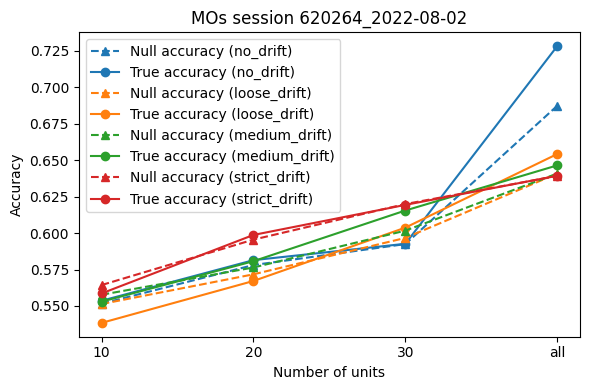

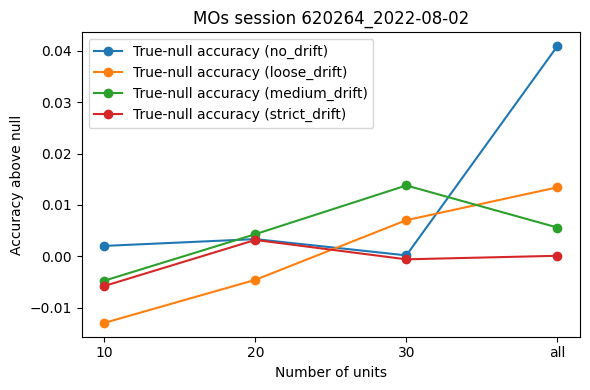

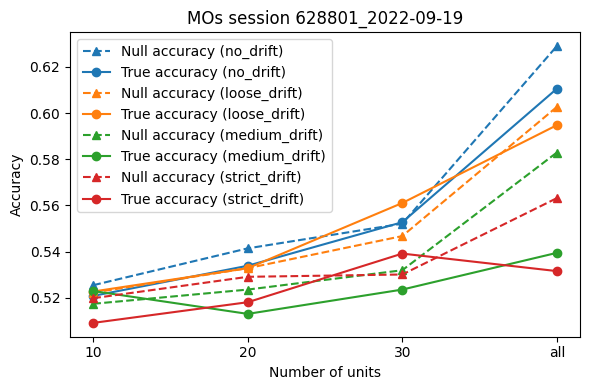

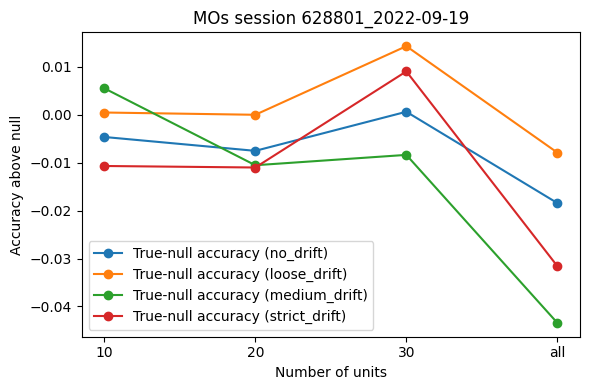

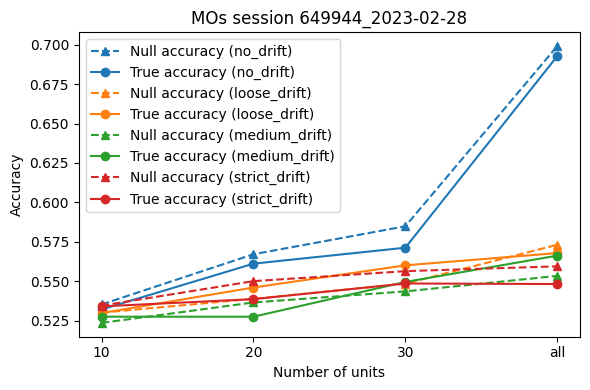

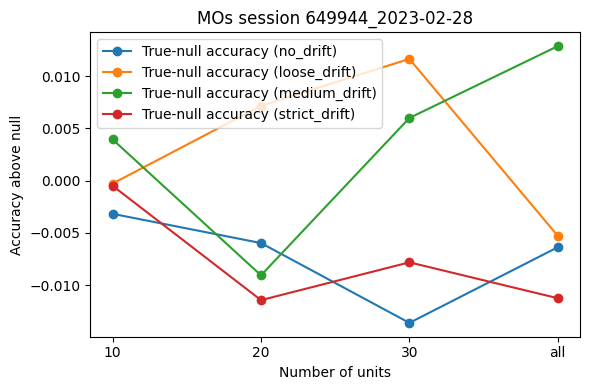

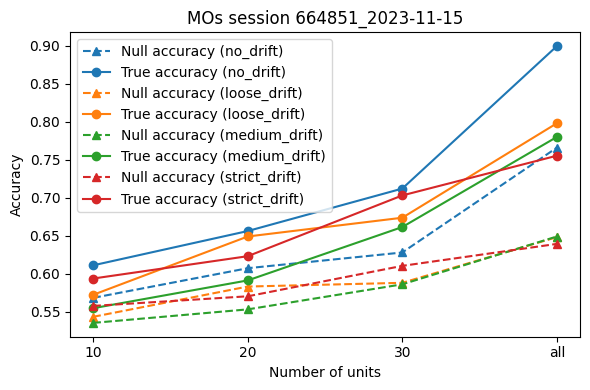

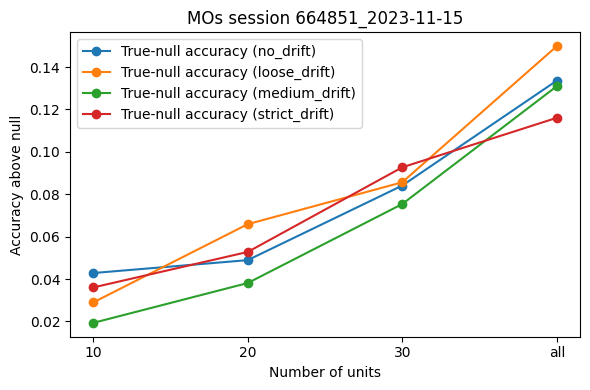

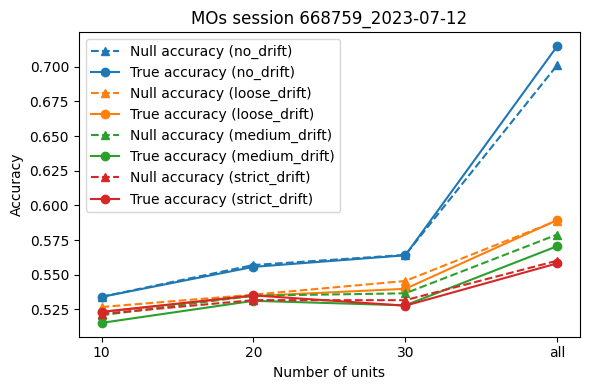

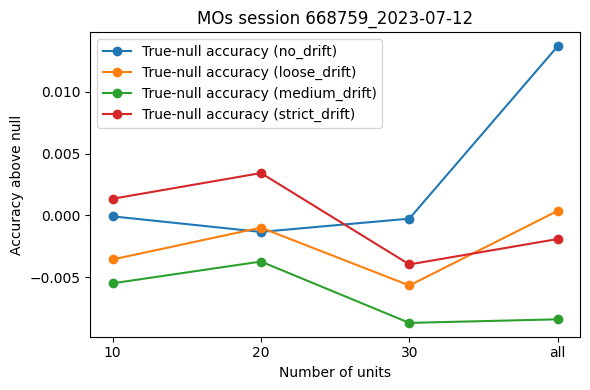

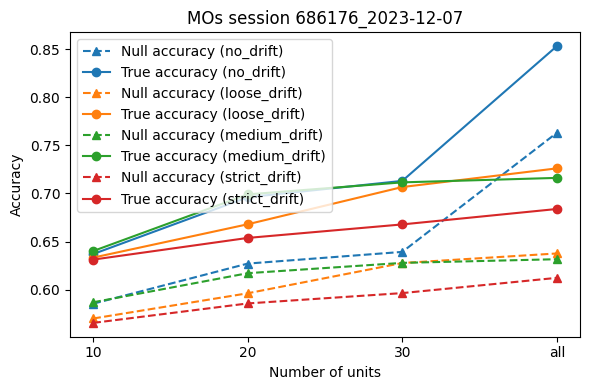

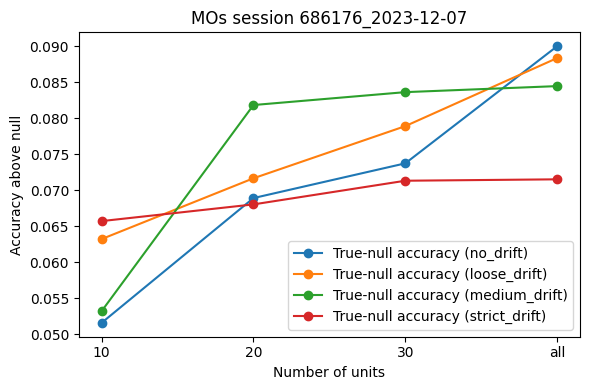

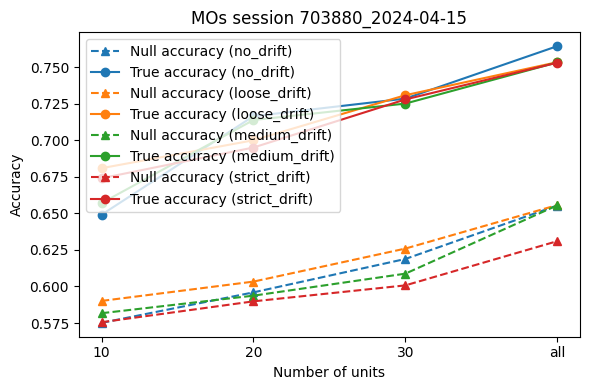

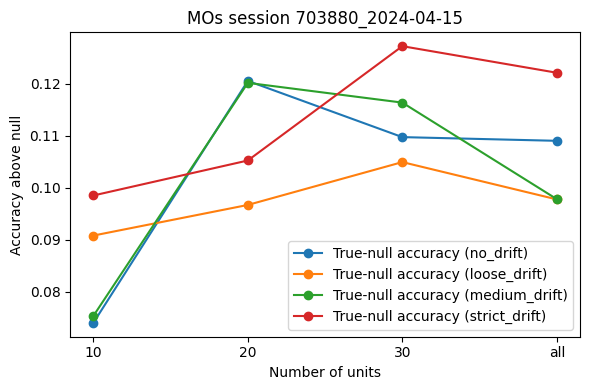

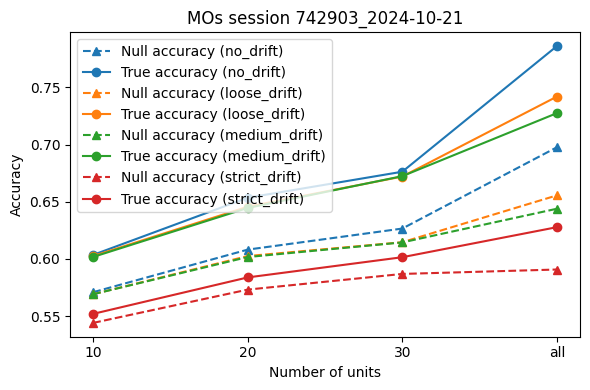

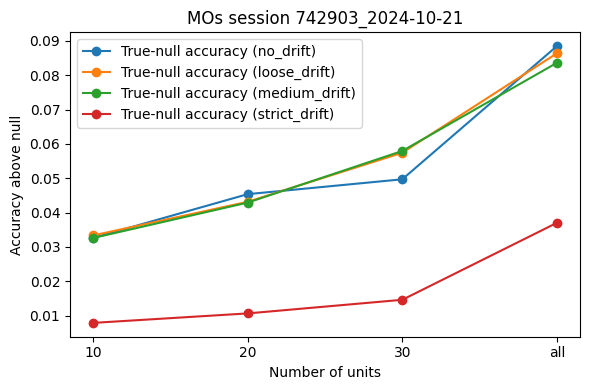

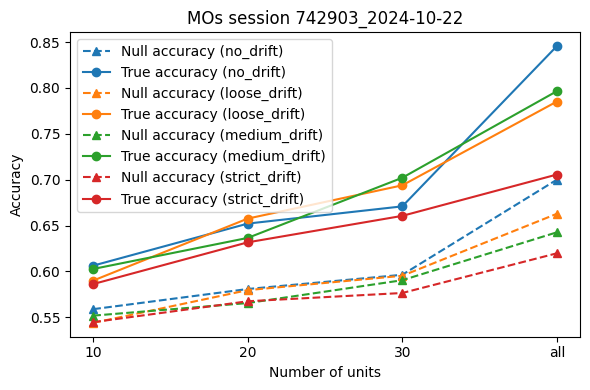

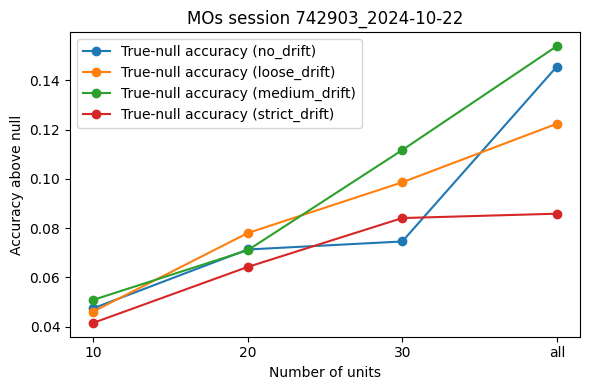

In [81]:
for session_id in session_ids:
    session_results=reshaped_results.query('session_id==@session_id')
    fig,ax=plt.subplots(figsize=(6,4))
    fig2,ax2=plt.subplots(figsize=(6,4))
    for sel_criteria in criteria:
    
        line=ax.plot(n_units_int,session_results['null_accuracy_median_'+sel_criteria].values[0],'^--',label=f'Null accuracy ({sel_criteria})')
        ax.plot(n_units_int,session_results['true_accuracy_'+sel_criteria].values[0],'o-',color=line[0].get_color(),label=f'True accuracy ({sel_criteria})')

        ax2.plot(n_units_int,session_results['true_accuracy_'+sel_criteria].values[0]-session_results['null_accuracy_median_'+sel_criteria].values[0],
                'o-',color=line[0].get_color(),label=f'True-null accuracy ({sel_criteria})')
    
    ax.set_title(f'{sel_area} session {session_id}')
    ax.set_xlabel('Number of units')
    ax.set_xticks(n_units_int)
    ax.set_xticklabels(n_units_str)
    ax.set_ylabel('Accuracy')
    ax.legend()
    fig.tight_layout()
    fig.savefig(upath.UPath(fig_folder)/f'{sel_area}_session_{session_id}_accuracy.png')

    ax2.set_title(f'{sel_area} session {session_id}')
    ax2.set_xlabel('Number of units')
    ax2.set_xticks(n_units_int)
    ax2.set_xticklabels(n_units_str)
    ax2.set_ylabel('Accuracy above null')
    ax2.legend()
    fig2.tight_layout()

    #save figure to fig_folder
    fig2.savefig(upath.UPath(fig_folder)/f'{sel_area}_session_{session_id}_accuracy_above_null.png')

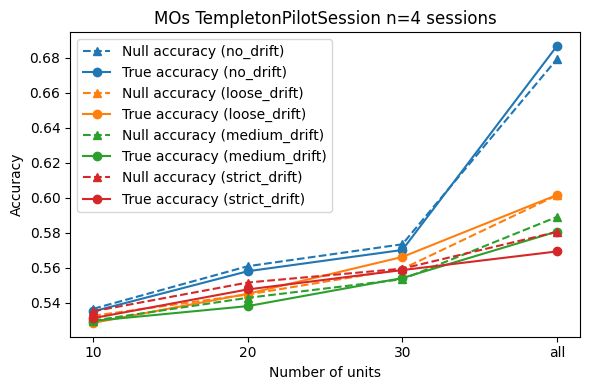

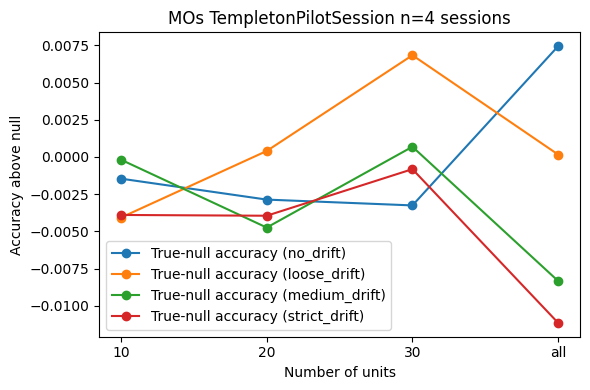

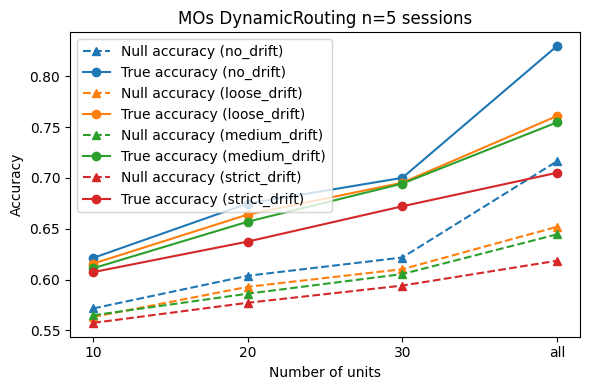

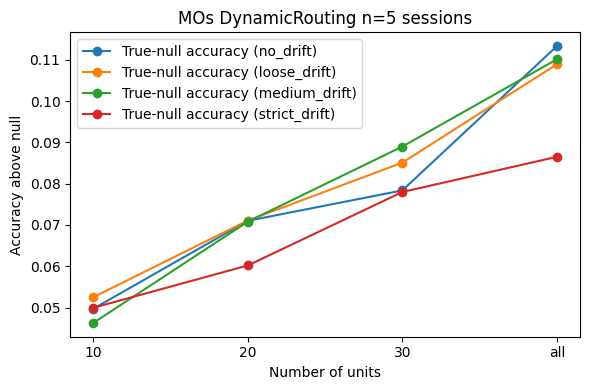

In [82]:
#plot grand averages for each drift criteria according to project

# sel_project='DynamicRouting'
# sel_project='TempletonPilotSession'
projects=reshaped_results['project'].unique()

for sel_project in projects:

    project_results=reshaped_results.query('project==@sel_project')
    fig,ax=plt.subplots(figsize=(6,4))
    fig2,ax2=plt.subplots(figsize=(6,4))

    for sel_criteria in criteria:

        line=ax.plot(n_units_int,np.nanmean(np.vstack(project_results['null_accuracy_median_'+sel_criteria]),axis=0),'^--',label=f'Null accuracy ({sel_criteria})')
        ax.plot(n_units_int,np.nanmean(np.vstack(project_results['true_accuracy_'+sel_criteria]),axis=0),'o-',color=line[0].get_color(),label=f'True accuracy ({sel_criteria})')

        ax2.plot(n_units_int,np.nanmean(np.vstack(project_results['true_accuracy_'+sel_criteria].values-project_results['null_accuracy_median_'+sel_criteria].values),axis=0),
                'o-',color=line[0].get_color(),label=f'True-null accuracy ({sel_criteria})')

    ax.set_title(f'{sel_area} {sel_project} n={len(project_results)} sessions')
    ax.set_xlabel('Number of units')
    ax.set_xticks(n_units_int)
    ax.set_xticklabels(n_units_str)
    ax.set_ylabel('Accuracy')
    ax.legend()
    fig.tight_layout()
    fig.savefig(upath.UPath(fig_folder)/f'{sel_area}_{sel_project}_mean_accuracy.png')

    ax2.set_title(f'{sel_area} {sel_project} n={len(project_results)} sessions')
    ax2.set_xlabel('Number of units')
    ax2.set_xticks(n_units_int)
    ax2.set_xticklabels(n_units_str)
    ax2.set_ylabel('Accuracy above null')
    ax2.legend()
    fig2.tight_layout()
    fig2.savefig(upath.UPath(fig_folder)/f'{sel_area}_{sel_project}_mean_accuracy_above_null.png')

In [83]:
np.nanmean(np.vstack(project_results['true_accuracy_'+sel_criteria].values-project_results['null_accuracy_median_'+sel_criteria].values),axis=0)

array([0.04994279, 0.06019668, 0.07799436, 0.08651432])

In [84]:
project_results['null_accuracy_median_'+sel_criteria].values

array([array([0.55737106, 0.57003364, 0.6100812 , 0.63900637]),
       array([0.56560901, 0.58580972, 0.5965522 , 0.61237988]),
       array([0.57555033, 0.58983114, 0.60075204, 0.63100022]),
       array([0.54411537, 0.57321967, 0.5869258 , 0.59078451]),
       array([0.54467343, 0.56743382, 0.57645024, 0.61971014])],
      dtype=object)